In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv ('2020-XTern-DS.csv')

In [59]:
#1) Displays restaurants with most votes first complemented by the rating and number of reviews 
df1 = df
df1 = df1.sort_values(by=['Votes'],ascending=False) #Sort votes
df1['Votes'] = df1['Votes'].str.replace('-', '0') #Replace null values with 0
df1['Votes'] = df1['Votes'].astype(int) #Covnert data to integer
df1['Rating'] = df1['Rating'].str.replace('-', 'No Rating') #Replace null values with "No Rating"
df1['Reviews'] = df1['Reviews'].str.replace('-', 'No Reviews') #Replace null values with "No Reviews"
df1['Votes'] = df1['Votes'].astype(int) #Convert data to integer
df1 = df1[['Restaurant','Votes','Rating','Reviews']] #Display only these columns
df1

,Restaurant,Votes,Rating,Reviews
646,ID_1784,992,3.9,513
1318,ID_7247,991,4.1,545
1023,ID_7632,99,3.7,50
2,ID_1595,99,3.6,30
552,ID_5708,986,2.6,691
...,...,...,...,...
727,ID_7801,0,3.3,No Reviews
1690,ID_7206,0,No Rating,No Reviews
1265,ID_7475,0,4.0,No Reviews
1687,ID_6087,0,No Rating,No Reviews


In [60]:
#2) Sort restaurants by average cost
df2 = df
df2['Average_Cost'] = df2['Average_Cost'].str.replace('$', '') #Remove the dollar sign from values
df2['Average_Cost'] = df2['Average_Cost'].str.replace(',', '.') #Convert commas to decimal points
df2['Average_Cost'] = df2['Average_Cost'].astype(float) #Convert values to floating point
df2['Average_Cost'] = df2['Average_Cost'].map('${:,.2f}'.format) #Add dollar sign to values
df2 = df2.sort_values(by=['Average_Cost']) #Sort average cost  
df2 = df2[['Restaurant','Average_Cost']] #Display only these columns
df2


,Restaurant,Average_Cost
822,ID_8117,$1.00
1296,ID_2545,$1.20
1171,ID_3279,$10.00
1595,ID_6636,$10.00
1596,ID_4102,$10.00
...,...,...
1501,ID_7924,$80.00
1544,ID_1804,$85.00
683,ID_5879,$90.00
784,ID_5879,$90.00


In [61]:
#3) Displays restaurants with no minimum order fee
df3 = df 
noMinOrder = df3['Minimum_Order'] == '$0.00' #Take values with no minimum order fee
df3 = df3[noMinOrder] 
print("Restaurants with no minimum order:") 
df3 = df3[['Restaurant','Minimum_Order']] #Display only these columns
df3

Restaurants with no minimum order:


,Restaurant,Minimum_Order
13,ID_354,$0.00
276,ID_7497,$0.00
277,ID_7057,$0.00
298,ID_2301,$0.00
473,ID_8450,$0.00
521,ID_7497,$0.00
598,ID_6001,$0.00
632,ID_2301,$0.00
697,ID_4784,$0.00
727,ID_7801,$0.00


,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,cluster_label
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,2
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,1
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,2
...,...,...,...,...,...,...,...,...,...,...,...
2616,ID_5794,39.764745,-85.121567,Bengali,$20.00,$50.00,3.3,16,6,30 minutes,1
2617,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes,1
2618,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes,0
2619,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes,2


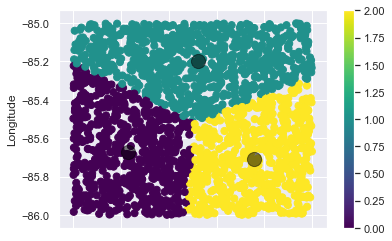

In [62]:
#4) Clustering locations of restaurants and plotting the result

df4 = df
X = df4.loc[:,['Restaurant','Latitude','Longitude']] #Variable with only columns needed
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
X = X[['Restaurant','cluster_label']]
clustered_data = df4.merge(X, left_on ='Restaurant', right_on = 'Restaurant')
clustered_data
